# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#cities

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print (query_url)
city_url = f"{query_url}{city}"
print(city_url)
city_weather = requests.get(city_url).json()
print(city_weather)

http://api.openweathermap.org/data/2.5/weather?appid=e890e23c1a29fb84c25e76d558564fbb&units=Metric&q=
http://api.openweathermap.org/data/2.5/weather?appid=e890e23c1a29fb84c25e76d558564fbb&units=Metric&q=ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 3.81, 'feels_like': -2.59, 'temp_min': 3.81, 'temp_max': 3.81, 'pressure': 988, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 12.35, 'deg': 240}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1682056000, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1682076878, 'sunset': 1682112532}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | doha
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | luganville
Processing Record 7 of Set 1 | amapa
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | port macquarie
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | carroll
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | virginia beach
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | rameshki
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | harper
Process

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,11.58,90,4,2.10,UY,1682056001
1,bethel,41.3712,-73.4140,11.30,67,75,1.54,US,1682055937
2,tura,25.5198,90.2201,33.27,43,21,3.68,IN,1682055942
3,doha,25.2867,51.5333,28.99,37,0,2.06,QA,1682056002
4,bredasdorp,-34.5322,20.0403,12.19,70,83,2.12,ZA,1682056003


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_weather/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_weather/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chuy,-33.6971,-53.4616,11.58,90,4,2.10,UY,1682056001
1,bethel,41.3712,-73.4140,11.30,67,75,1.54,US,1682055937
2,tura,25.5198,90.2201,33.27,43,21,3.68,IN,1682055942
3,doha,25.2867,51.5333,28.99,37,0,2.06,QA,1682056002
4,bredasdorp,-34.5322,20.0403,12.19,70,83,2.12,ZA,1682056003


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

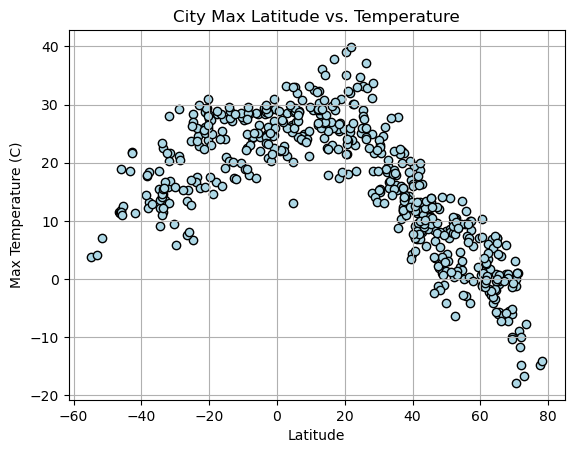

In [16]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(latitude, temperature, marker='o', edgecolors='black', color = 'lightblue' )
plt.title(f"City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.grid()
# Save the figure
plt.savefig("output_weather/Latitude vs Tem.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

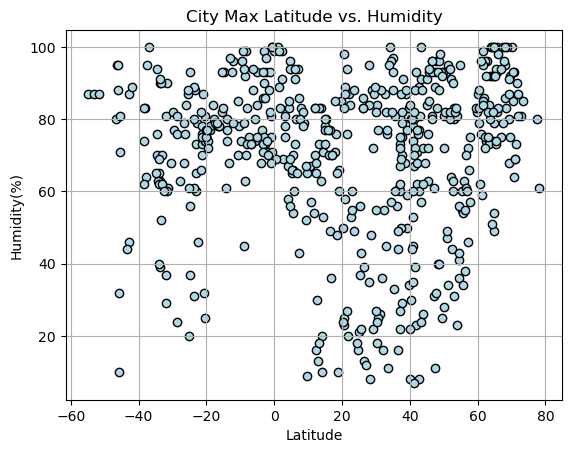

In [18]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude, humidity, marker='o', edgecolors='black', color = 'lightblue' )
plt.title(f"City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel('Humidity(%)')
plt.grid()
# Save the figure
plt.savefig("output_weather/Latitude vs Hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

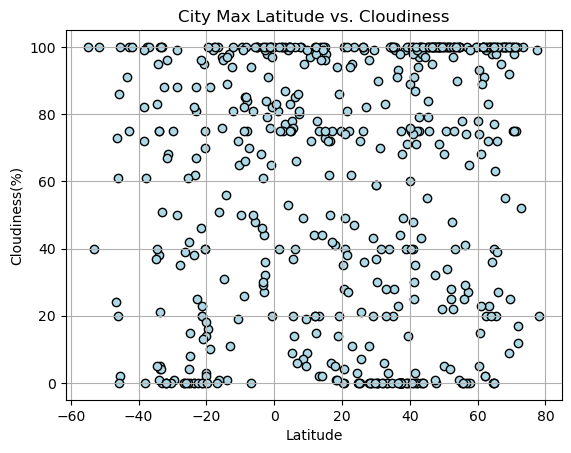

In [22]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, marker='o', edgecolors='black', color = 'lightblue' )
plt.title(f"City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig("output_weather/Latitude vs. Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

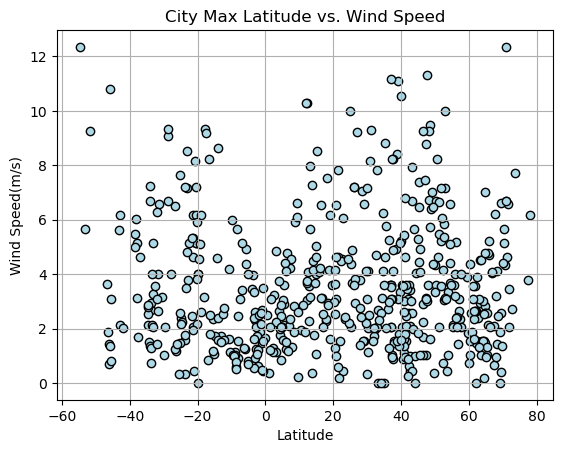

In [25]:
# Build the scatter plots for latitude vs. wind speed
Windspeed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(latitude, Windspeed, marker='o', edgecolors='black', color = 'lightblue' )
plt.title(f"City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed(m/s)')
plt.grid()

# Save the figure
plt.savefig("output_weather/Latitude vs. Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
from scipy.stats import linregress
from scipy import stats

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,11.30,67,75,1.54,US,1682055937
2,tura,25.5198,90.2201,33.27,43,21,3.68,IN,1682055942
3,doha,25.2867,51.5333,28.99,37,0,2.06,QA,1682056002
6,amapa,1.0000,-52.0000,22.08,100,81,0.35,BR,1682055811
7,jamestown,42.0970,-79.2353,18.80,62,0,3.09,US,1682056004


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chuy,-33.6971,-53.4616,11.58,90,4,2.10,UY,1682056001
4,bredasdorp,-34.5322,20.0403,12.19,70,83,2.12,ZA,1682056003
5,luganville,-15.5333,167.1667,27.57,82,97,2.36,VU,1682056003
8,saint-pierre,-21.3393,55.4781,29.20,70,0,6.17,RE,1682056005
9,port macquarie,-31.4333,152.9167,21.61,61,68,6.58,AU,1682055932


###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.8930384946850677


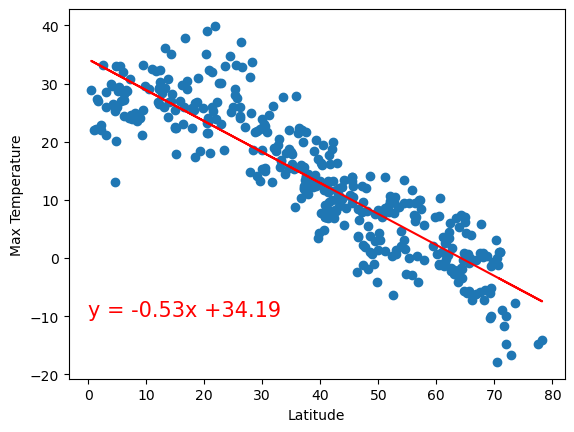

In [44]:
# Linear regression on Northern Hemisphere
north_temp = northern_hemi_df['Max Temp']
north_lat = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Print r value
print(f"r-value = {(rvalue)}")


r-value = 0.6627308394834807


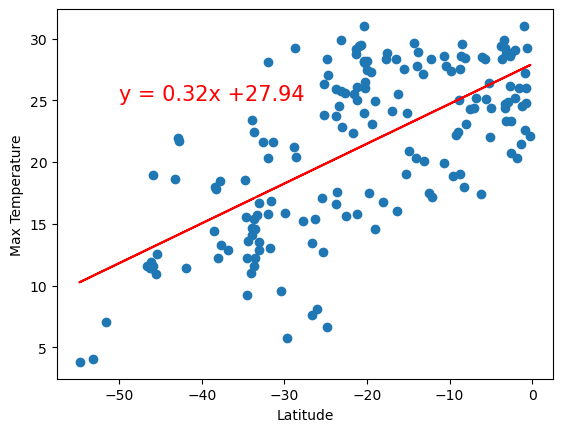

In [48]:
# Linear regression on Northern Hemisphere
south_temp = southern_hemi_df['Max Temp']
south_lat = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat,south_temp)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Print r value
print(f"r-value = {(rvalue)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.20051914411175273


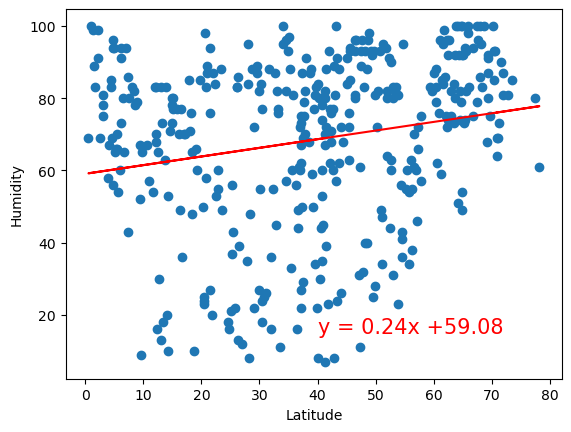

In [49]:
# Northern Hemisphere
north_humi = northern_hemi_df["Humidity"]
north_lat = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_humi)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(north_lat, north_humi)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r value
print(f"r-value = {(rvalue)}")


r-value = 0.26246772726220474


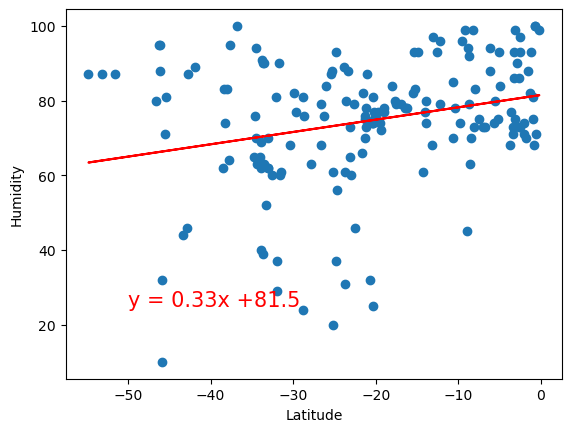

In [50]:
# Southern Hemisphere
south_humi = southern_hemi_df["Humidity"]

south_lat = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat,south_humi)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(south_lat, south_humi)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r value
print(f"r-value = {(rvalue)}")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.10828957447429513


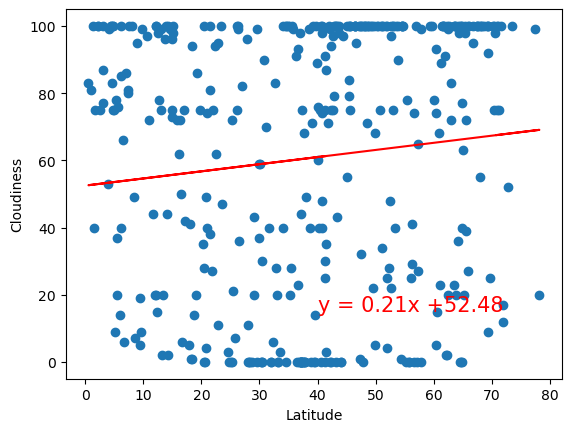

In [51]:
# Northern Hemisphere
north_cloud = northern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r value
print(f"r-value = {(rvalue)}")



r-value = 0.18904119948195647


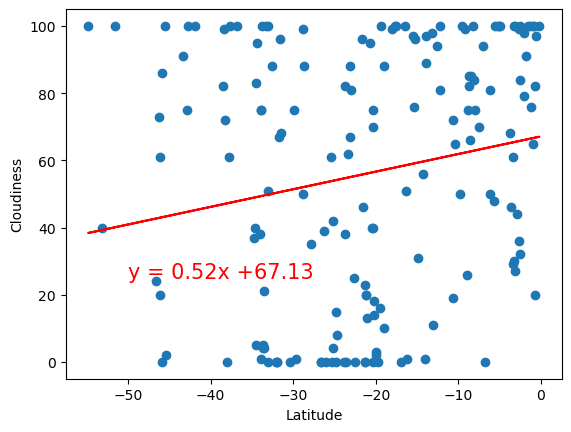

In [52]:
# Southern Hemisphere
south_cloud = southern_hemi_df["Cloudiness"]

south_lat = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat,south_cloud)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r value
print(f"r-value = {(rvalue)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.028320045067728387


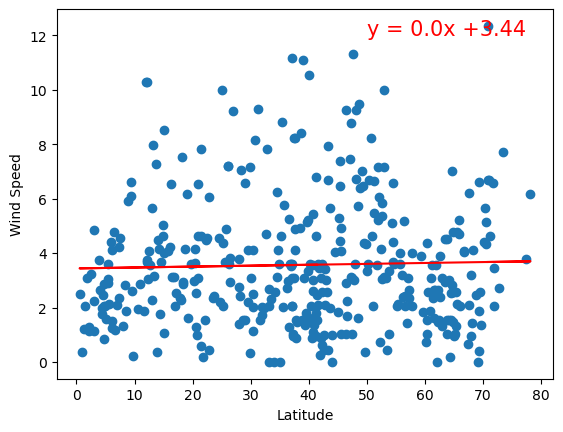

In [54]:
# Northern Hemisphere
north_wind = northern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r value
print(f"r-value = {(rvalue)}")

r-value = -0.31424882030717527


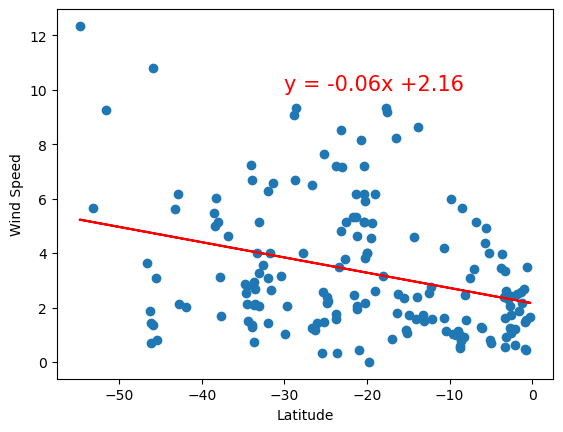

In [58]:
# Southern Hemisphere
south_wind = southern_hemi_df["Wind Speed"]

south_lat = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat,south_wind)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Linear regression
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r value
print(f"r-value = {(rvalue)}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# 1, When r-value is getting lower, the correlation between the two variables is weaker.
# 2, The relationship between latitude and temperature is strong indicated by the r-value.